<a href="https://colab.research.google.com/github/shaaagri/iat481-cv-proj/blob/wip/ComputerVisionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Wildlife and Pest Animal Detection Using YOLO <b> </h1></center>

This tutorial is designed to provide a comprehensive understanding of how to use YOLO, a state-of-the-art method in computer vision, for detecting objects in images.

Object detection and classification is a key technology in many areas, such as automated vehicles, security, and even healthcare.

We will begin with the basics of preparing (pre processing) an image dataset, ensuring it is ready for effective model training.We will then explore how YOLO, a type of convolutional neural network, automatically extracts features from images to recognize different objects. Understanding this process is crucial for grasping how YOLO operates.

The core of this tutorial is focused on transfer learning using YOLO. We will teach you how to take a pre-trained YOLO model and adapt it to a new dataset. This technique is efficient and powerful, allowing us to harness the strengths of YOLO with less computational effort.

By the end of this tutorial, you will have hands-on experience with preparing data, implementing YOLO, and understanding the principles behind it. This tutorial aims to equip students with practical skills and knowledge in one of the most exciting fields in technology.

Since its inception, the YOLO family of object detection models has come a long way. YOLOv8 is the most recent addition to this famous anchor-based single-shot family of object detectors. It comes with a bunch of improvements which include state-of-the-art accuracy and speed.  In this article, we will be fine tuning the YOLOv8 object detection model on a real-world pothole detection dataset.

In the previous lecture, you were asked to make your own custom datasets for a project you want to work on. Today we will explore how to finetune YOLO on a certain dataset.  

Importing required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

# Dataset Description






Fruit Images for Object Detection

available on kaggle => https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection


- 240 images in train folder. 60 images in test folder.

- 3 different fruits:

    - Apple

    - Banana

    - Orange

The labels are in xml format, which is Extensible markup language.Storing image dataset labels in XML format is quite common. XML provides a clear, hierarchical structure which is ideal for representing the complex data associated with image labels. This includes not just the class of the object, but potentially a wealth of other information like bounding box coordinates, object IDs, and additional metadata.


# Data Preprocessing

For preprocessing:
- We have to convert the dataset into that acceptable by YOLO.
  - Heirarchy of folders should be the one accepted by YOLO
  - Labels format should be darknet YOLO.
  - Labels files should be .txt files
- Check and see if there are any missing labels or images. And remove them from dataset.


## Heirarchy of Folders correction

Defining paths to train and test folders.



The train and test folders have all the images and labels together.

But for YOLO, the directories should be in:

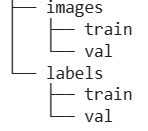


Making directories according to above struture of folders

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
# set the path to the pest detection dataset
dataset_root = '/content/drive/MyDrive/IAT481/481 CV Project/Datasets/Final'

**NOTE FROM THE STUDENT TEAM:** we removed unnecessary code/text blocks from the original notebook. To see our dataset preparation, merging, balancing, preparation and cleaning, take a look at [DatasetPrep.ipynb](https://colab.research.google.com/github/shaaagri/iat481-cv-proj/blob/wip/DatasetPrep.ipynb) notebook. To do visualization of some of the pictures from our final dataset, see [DatasetVisualization.ipynb](https://colab.research.google.com/github/shaaagri/iat481-cv-proj/blob/wip/DatasetVisualization.ipynb) notebook.

# Custom object detection using YOLO

First install and import

In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [4]:
from ultralytics import YOLO

## Training YOLO

We are going to select small pretrained (on COCO dataset) model of YOLOv8

In [19]:
yolo_root = '/content/drive/MyDrive/IAT481/481 CV Project/yolo'

In [22]:
%cd $yolo_root

/content/drive/.shortcut-targets-by-id/13FaXzyfvSXh_PD6h92caiYAKqKbPsFTR/481 CV Project/yolo


In [25]:
%pwd

'/content/drive/.shortcut-targets-by-id/13FaXzyfvSXh_PD6h92caiYAKqKbPsFTR/481 CV Project/yolo'

In [42]:
model = YOLO('yolov8m.pt') # pretrained model

100%|██████████| 49.7M/49.7M [00:00<00:00, 135MB/s]


The detailed architecture of the model can be seen from:


In [43]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_

In [33]:
%%writefile config.yaml
path: '/content/drive/MyDrive/IAT481/481 CV Project/Datasets/Final'
train: '/content/drive/MyDrive/IAT481/481 CV Project/Datasets/Final/train/images'
val: '/content/drive/MyDrive/IAT481/481 CV Project/Datasets/Final/valid/images'
test: '/content/drive/MyDrive/IAT481/481 CV Project/Datasets/Final//test/images'

# Classes
nc: 4 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: bear
  1: raccoon
  2: rat
  3: skunk

Writing config.yaml


Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [45]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# querying info about our GPU
!nvidia-smi

Wed Mar 13 05:03:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0              28W /  70W |   1283MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [47]:
model.train(data="config.yaml", epochs=20, patience=5, batch=8, lr0=0.0005, imgsz=640)

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=config.yaml, epochs=20, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

train: Scanning /content/drive/.shortcut-targets-by-id/13FaXzyfvSXh_PD6h92caiYAKqKbPsFTR/481 CV Project/Datasets/Final/train/labels.cache... 643 images, 0 backgrounds, 0 corrupt: 100%|██████████| 643/643 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/.shortcut-targets-by-id/13FaXzyfvSXh_PD6h92caiYAKqKbPsFTR/481 CV Project/Datasets/Final/valid/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       4.5G      1.297      2.429      1.688          8        640: 100%|██████████| 81/81 [00:28<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]

                   all         80         96      0.368      0.374      0.344      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.37G      1.548        2.6      1.864         12        640: 100%|██████████| 81/81 [00:26<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]

                   all         80         96      0.257      0.368      0.221     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.38G      1.618      2.302      1.866         12        640: 100%|██████████| 81/81 [00:25<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]

                   all         80         96     0.0672      0.349     0.0349     0.0142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.38G      1.641      2.285       1.91          9        640: 100%|██████████| 81/81 [00:25<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]

                   all         80         96     0.0501      0.372     0.0346     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.37G      1.644      2.237      1.939          7        640: 100%|██████████| 81/81 [00:25<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.63it/s]

                   all         80         96       0.38      0.186      0.152     0.0424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.35G      1.597      2.162      1.867         14        640: 100%|██████████| 81/81 [00:26<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]

                   all         80         96      0.437      0.467      0.486      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.37G      1.524      1.973      1.826          8        640: 100%|██████████| 81/81 [00:25<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]

                   all         80         96       0.49      0.501      0.507      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.37G       1.52      1.883      1.787          9        640: 100%|██████████| 81/81 [00:25<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]

                   all         80         96      0.548      0.677      0.675      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.38G       1.44      1.776      1.718         11        640: 100%|██████████| 81/81 [00:25<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]

                   all         80         96      0.733      0.499      0.692      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.37G      1.395      1.692      1.679         10        640: 100%|██████████| 81/81 [00:25<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

                   all         80         96      0.725      0.651      0.751      0.377


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.37G      1.373      1.638      1.835          3        640: 100%|██████████| 81/81 [00:26<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]

                   all         80         96       0.67      0.632      0.708      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.37G      1.338      1.435      1.807          3        640: 100%|██████████| 81/81 [00:24<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.79it/s]

                   all         80         96      0.797      0.645      0.789       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.37G      1.307      1.353      1.779          3        640: 100%|██████████| 81/81 [00:25<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.84it/s]

                   all         80         96       0.72      0.688      0.752      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.37G      1.293      1.315      1.772          5        640: 100%|██████████| 81/81 [00:25<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]

                   all         80         96      0.666      0.696      0.774      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.38G      1.232       1.22      1.734          3        640: 100%|██████████| 81/81 [00:24<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.83it/s]

                   all         80         96      0.735      0.829      0.797      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.37G       1.21      1.213      1.682          3        640: 100%|██████████| 81/81 [00:25<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.85it/s]

                   all         80         96      0.717      0.761      0.791      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.37G      1.156      1.094      1.633          3        640: 100%|██████████| 81/81 [00:24<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]

                   all         80         96      0.867      0.763      0.862        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.37G      1.084      1.024      1.601          3        640: 100%|██████████| 81/81 [00:25<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]

                   all         80         96      0.828      0.873      0.885      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.38G      1.031     0.9682      1.539         22        640: 100%|██████████| 81/81 [00:26<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.76it/s]

                   all         80         96      0.803      0.846      0.876      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.37G      1.026     0.8923      1.521          3        640: 100%|██████████| 81/81 [00:24<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.76it/s]

                   all         80         96       0.83      0.824      0.851      0.524



20 epochs completed in 0.170 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 52.0MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


                   all         80         96      0.828      0.873      0.885      0.546
                  bear         80         20      0.815       0.85      0.858      0.652
               raccoon         80         21      0.837          1       0.98      0.605
                   rat         80         35      0.711      0.703      0.729      0.315
                 skunk         80         20      0.949      0.939      0.971      0.611
Speed: 1.2ms preprocess, 12.2ms inference, 0.0ms loss, 7.9ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a5772385a50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

## Evaluation Metrics

[This](https://docs.ultralytics.com/guides/yolo-performance-metrics/) is a very good detailed explanation of different perfromance metrics in YOLO.

**Choosing the Right Metrics**

Choosing the right metrics to evaluate often depends on the specific application.

- mAP: Suitable for a broad assessment of model performance.

- IoU: Essential when precise object location is crucial.

- Precision: Important when minimizing false detections is a priority.

- Recall: Vital when it's important to detect every instance of an object.

- F1 Score: Useful when a balance between precision and recall is needed.


In [48]:
  metrics = model.val()  # no arguments needed, dataset and settings remembered
  metrics.box.map    # map50-95
  metrics.box.map50  # map50
  metrics.box.map75  # map75
  metrics.box.maps   # a list contains map50-95 of each category
  metrics.box.mp    # P
  metrics.box.mr    # R

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/13FaXzyfvSXh_PD6h92caiYAKqKbPsFTR/481 CV Project/Datasets/Final/valid/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


                   all         80         96      0.823      0.865      0.883      0.547
                  bear         80         20      0.822       0.85      0.859      0.652
               raccoon         80         21      0.839      0.989       0.98      0.604
                   rat         80         35      0.684      0.686      0.722      0.319
                 skunk         80         20      0.949      0.936      0.971      0.611
Speed: 0.5ms preprocess, 33.3ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train52


0.8651876314029434

Showing confusion matrix, that is already stored in detect/train folder

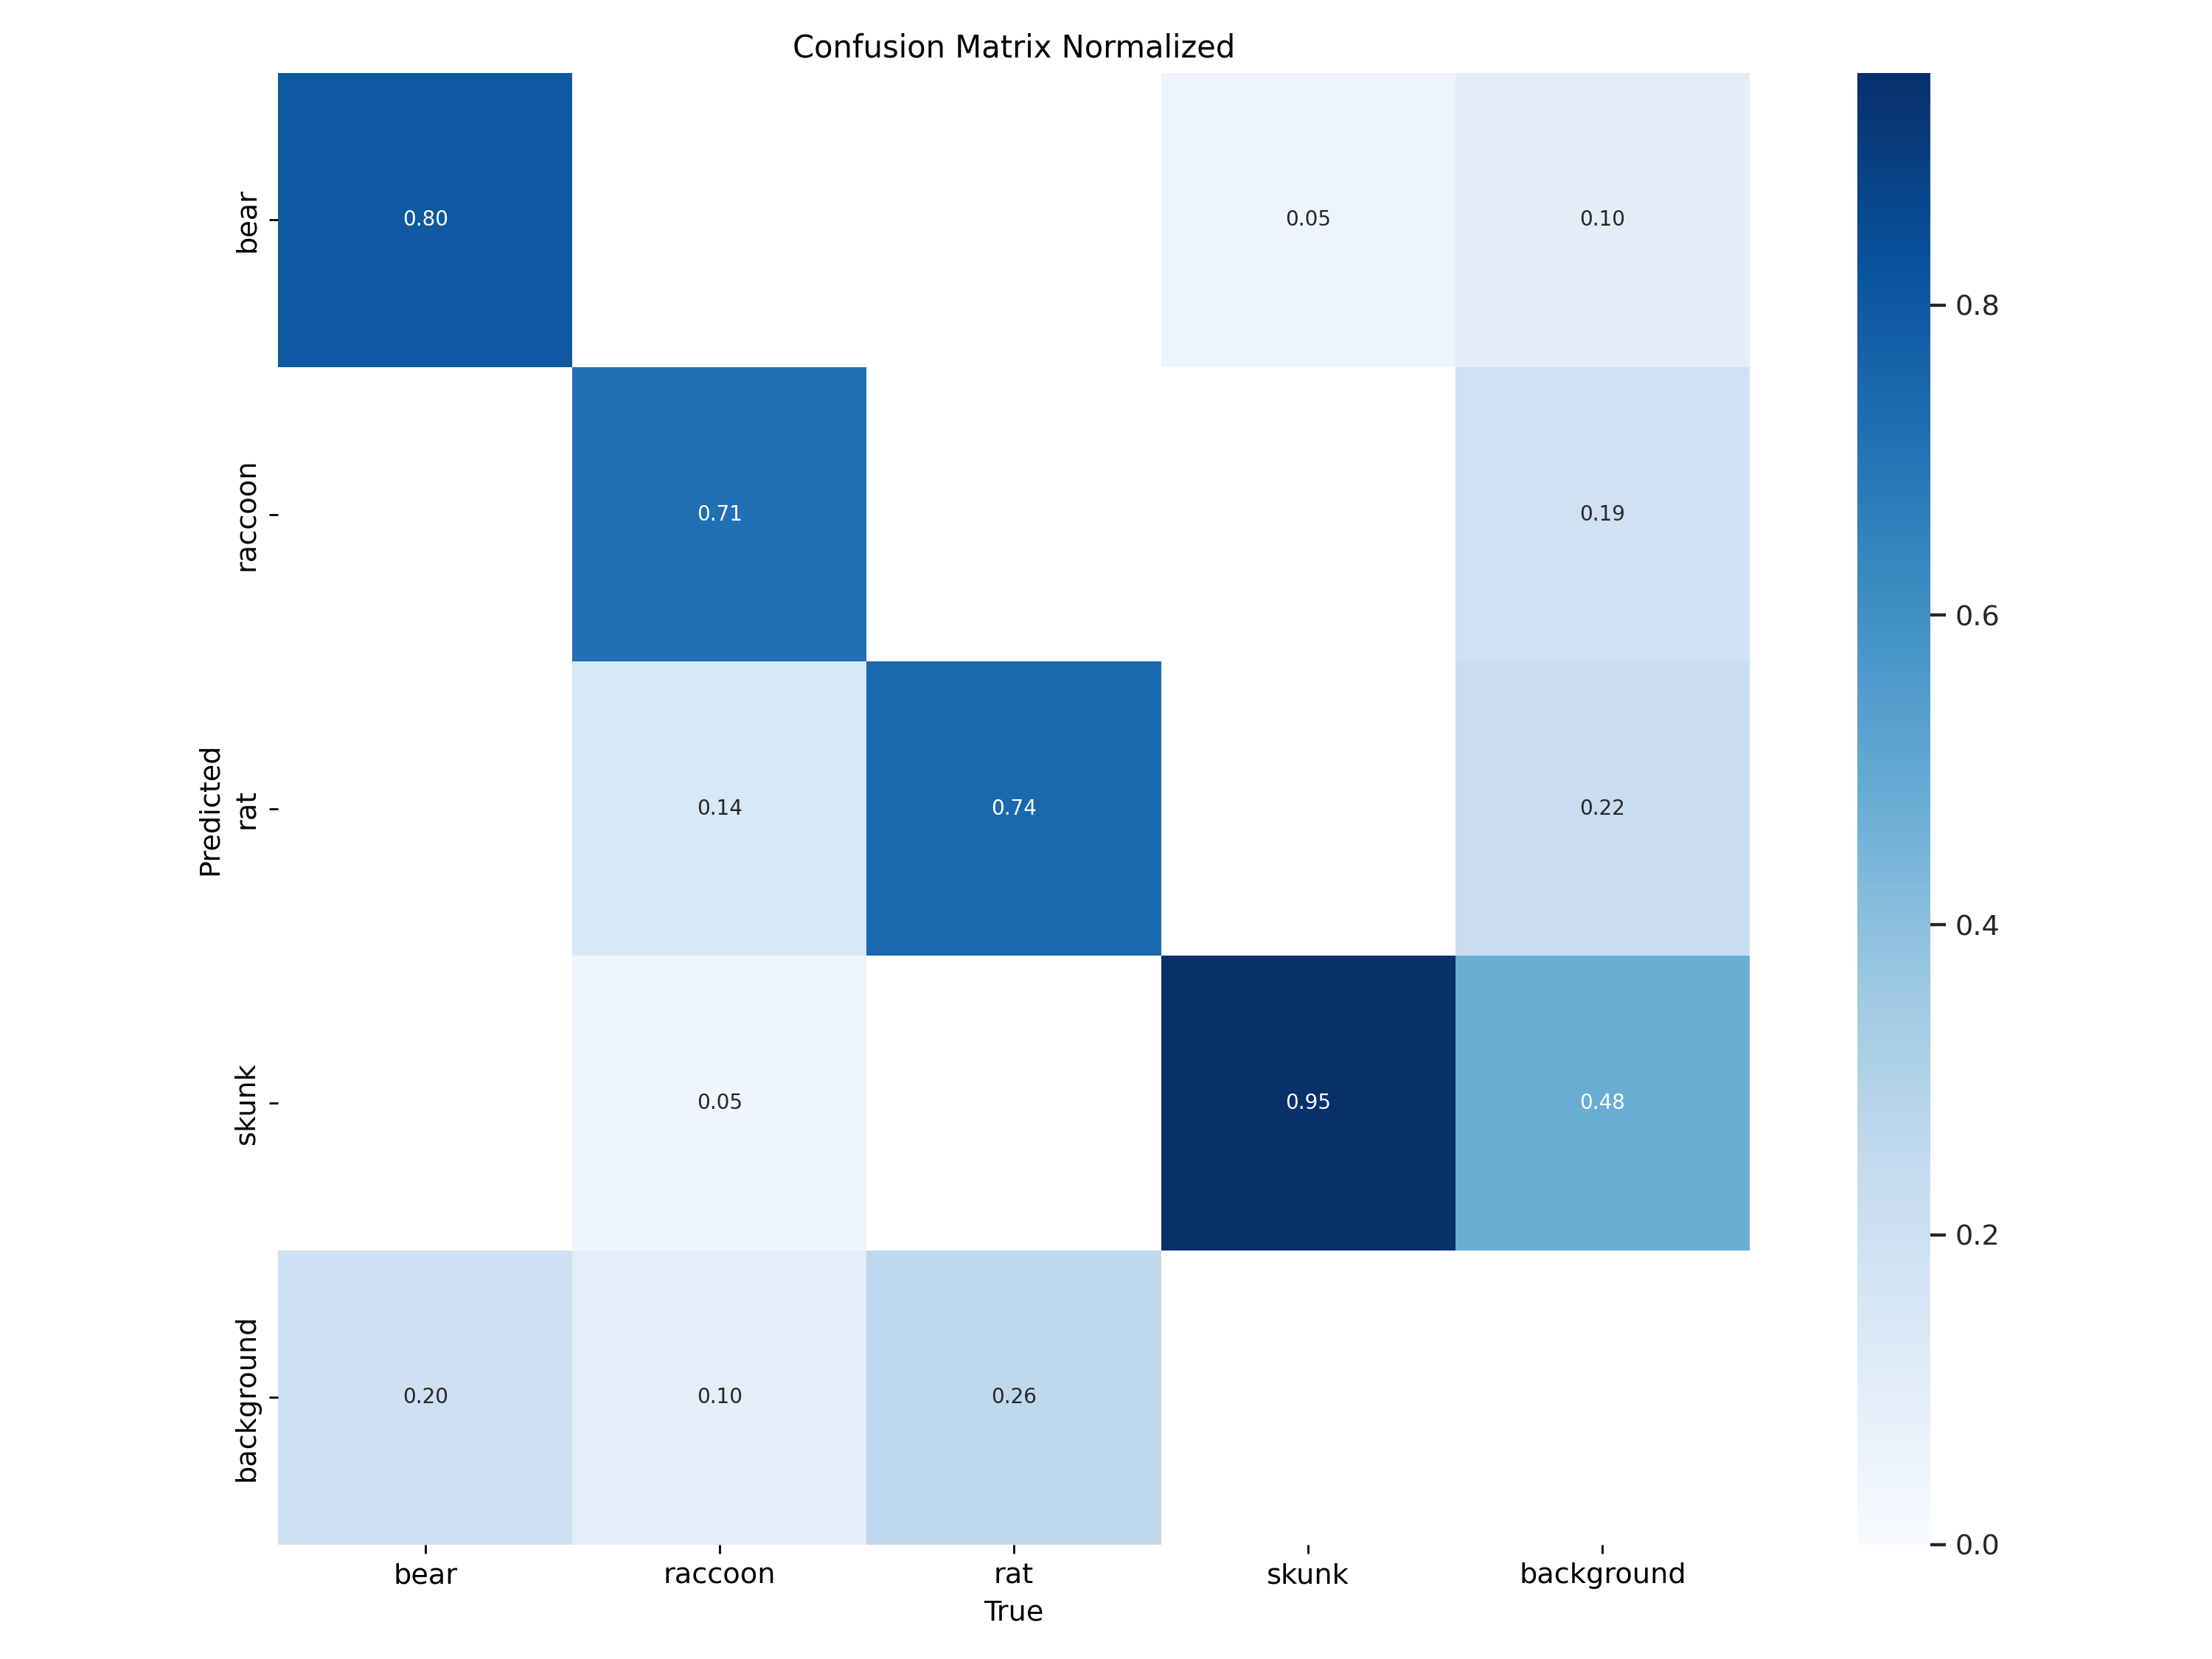

In [50]:
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/IAT481/481 CV Project/yolo/runs/detect/train3/confusion_matrix_normalized.png')

##Prediction

In [55]:
model = YOLO('/content/drive/MyDrive/IAT481/481 CV Project/yolo/runs/detect/train3/weights/best.pt')  # load a custom model

# Predict with the model with any image from internet?
results = model('https://i.ytimg.com/vi/i9LbUPpgXzc/maxresdefault.jpg', save=True)

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


100%|██████████| 299k/299k [00:00<00:00, 56.3MB/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/drive/.shortcut-targets-by-id/13FaXzyfvSXh_PD6h92caiYAKqKbPsFTR/481 CV Project/yolo/maxresdefault.jpg: 384x640 1 bear, 1513.0ms
Speed: 6.4ms preprocess, 1513.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict5


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


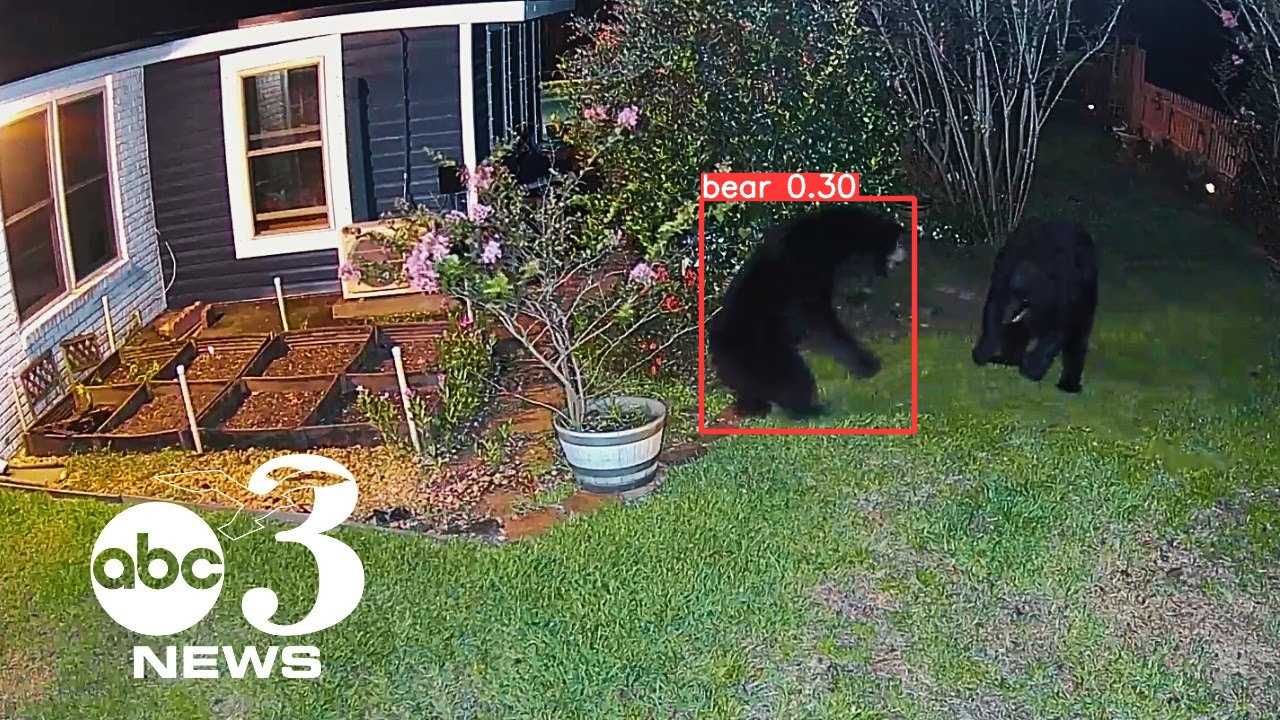

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


In [56]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/IAT481/481 CV Project/yolo/runs/detect/predict5/maxresdefault.jpg')